# Домашнее задание 3

## Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

#### Решение

In [122]:
import numpy as np

In [123]:
df = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [124]:
df

array([100,  80,  75,  77,  89,  33,  45,  25,  65,  17,  30,  24,  57,
        55,  70,  75,  65,  84,  90, 150])

#### Среднее арифметическое

In [125]:
avg = df.sum()/df.size
avg

65.3

#### Среднее квадратичное отклонение

In [126]:
std = ( ((df - avg)**2).sum()*1/df.size )**(0.5)
std

30.823854398825596

#### Смещенная оценка дисперсии

In [127]:
var = std**2
var

950.11

#### Несмещенная оценка дисперсии

In [128]:
var_unbiased = var*df.size/(df.size - 1)
var_unbiased

1000.1157894736842

#### Let's check dat

In [129]:
avg - df.mean(), std - df.std(), var - df.var(ddof=0), var_unbiased - df.var(ddof=1)


(0.0, 0.0, 0.0, 0.0)

## Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

#### Решение

In [130]:
import pandas as pd

In [131]:
df

array([100,  80,  75,  77,  89,  33,  45,  25,  65,  17,  30,  24,  57,
        55,  70,  75,  65,  84,  90, 150])

In [132]:
df = pd.DataFrame(df)

__Квантили 1 и 3:__

In [133]:
df[0].quantile(0.25), df[0].quantile(0.75)

(42.0, 81.0)

__Интерквартильное расстояние__

In [134]:
-df[0].quantile(0.25) + df[0].quantile(0.75)

39.0

In [135]:
from matplotlib import pyplot as plt


In [136]:
plot = df.boxplot()

Вмсето графика я вижу только : <AxesSubplot:>

На исходном вашем файле то же самое. Что я делаю не так?

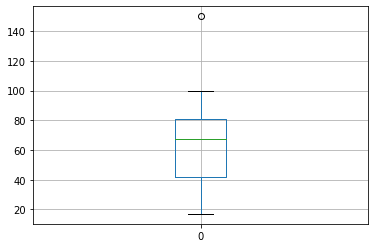

In [138]:
plt.show()

Наблюдаем выброс где-то 150. Также видим, что...кстати, не до конца понял, о чем говорит несимметричность. Ну т е понятно, что Q1 ближе к медиане, чем Q3, это из-за большей плотности чисел после медианы? Большего разнообразия ниже медианы?

## Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Решение

Обозначим $A_1, A_2, A_3$ - события учиться в А, B and C факультетах.

B - событие сдать сессию

$P(A_1 | B) = \frac{P(A_1 B)}{P(B)}$

$P(A_1 | B) = \frac{P(B|A_1) \cdot P(A_1)}{P(B)} = \frac{P(B|A_1) \cdot P(A_1)}{P(B|A_1)\cdot P(A_1) + P(B|A_2)\cdot P(A_2) + P(B|A_3)\cdot P(A_3)}$ = 

$= \frac{0.8\cdot \frac{1}{4}}{0.8\cdot \frac{1}{4} + 0.7\cdot \frac{1}{4} + 0.9\cdot \frac{1}{2}} = \frac{0.2}{0.2 + 0.7\cdot 0.25 + 0.9\cdot 0.5} = 0.24$

In [140]:
0.2/(0.2 + 0.7*0.25 + 0.9*0.5)

0.24242424242424246

$P(A_2|B) = \frac{0.7\cdot 0.25}{(0.2 + 0.7*0.25 + 0.9*0.5)} = 0.21$

In [141]:
0.7*0.25/(0.2 + 0.7*0.25 + 0.9*0.5)

0.21212121212121213

$P(A_3|B) = \frac{0.9\cdot 0.5}{(0.2 + 0.7*0.25 + 0.9*0.5)} = 0.54$

In [142]:
0.9*0.5/(0.2 + 0.7*0.25 + 0.9*0.5)

0.5454545454545455

С учетом погрешности, вроде все сходится